# Muhid Qaiser, 22i-0472, AI-B, Assignment-1

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Q1

### Main and Best Attempt

In [35]:

# * Function to process the video and save output
def process_video(input_path, output_path):

    # * Load the background image
    bg_img = cv2.imread("../background.jpg", cv2.IMREAD_GRAYSCALE)
    bg_img = cv2.resize(bg_img, (854, 480), interpolation=cv2.INTER_NEAREST)

    # * Load the video
    cap = cv2.VideoCapture(input_path)

    # * Read the first frame as reference for background modeling
    ret, first_frame = cap.read()
    if not ret:
        print("Error: Could not read the first frame.")
        return
    
    # * Convert first frame to grayscale
    first_frame = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    height, width = first_frame.shape

    # * Initialize background model (running average)
    # * Hyperparameter for updating background with each frame
    alpha = 0.1  

    # * Convert first frame to float for running average
    background = first_frame.astype(float)

    # * Create VideoWriter to save processed output
    fourcc = cv2.VideoWriter_fourcc(*'XVID')

    # * Run video at 20 frames per second
    out = cv2.VideoWriter(output_path, fourcc, 20.0, (width, height), isColor=False)

    # * Process video frame by frame till all frames are read
    while True:
        ret, frame = cap.read()

        # * Break if no frame is read
        if not ret:
            break

        # * Convert frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # * Compute absolute difference between current frame and background model
        diff = cv2.absdiff(gray, background.astype(np.uint8))

        # * Normalize negative values using shift-and-scale method
        # * First add the smallest intensity to all elements then
        # * Multiply each pixel with 255 / largest intensity value
        normalized_diff = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX)

        # * Create binary mask for foreground using thresholding
        # * We are trying to separate the foreground from the background using thresholding
        # * Used adative thresholding to get better results
        mask = cv2.adaptiveThreshold(normalized_diff, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, -10)
        # _, mask = cv2.threshold(normalized_diff, 128, 255, cv2.THRESH_BINARY)

        # * Define a threshold of distance of white pixels to fill gaps between
        distance_threshold = 100  

        # * Loop through each row
        # * Goal is to loop through each row, find the white pixels with gap less than distance_threshold, and fill the gaps between them
        for y in range(height):
            
            # * Get the current row
            row = mask[y, :]  
            
            # * Find indices where pixels are white (255)
            white_pixels = np.where(row == 255)[0]
            
            # * If there are more than 1 white pixels in the row
            if len(white_pixels) > 1:
                
                # * Start from the first white pixel
                min_x = white_pixels[0]

                # * Iterate through white pixel positions
                for i in range(1, len(white_pixels)):
                    current_x = white_pixels[i]

                    # * If the gap is smaller than threshold, fill it
                    if current_x - min_x <= distance_threshold:
                        # * Fill the gap with White to signify foreground
                        mask[y, min_x:current_x] = 255 

                    else:
                        # * Large gap detected, update min_x to new segment
                        min_x = current_x

        # * Apply a box filter to smooth the mask
        mask = cv2.boxFilter(mask, -1, (5, 5))

        # * Include or remove for varying results
        _, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)

        # * Apply a median blur to remove small noise
        mask = cv2.medianBlur(mask, 5)
        
        # * Swapping all background pixels with the background image
        idx = mask < 255
        mask[idx] = bg_img[idx]

        # # * Swapping all foreground pixels with the current frame
        idx = mask >= 255
        mask[idx] = gray[idx]

        # * Update background model using a running average
        cv2.accumulateWeighted(gray, background, alpha)

        # * Write processed frame to output video
        out.write(mask)

        # * Display Frames
        cv2.imshow("Foreground Mask", mask)
        
        # * Press 'Esc' to exit
        if cv2.waitKey(30) & 0xFF == 27:  
            break

    # * Release resources and close windows
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print("Processing complete. Video saved.")

# * Run the video preprocessing function
input_video_path = "../q1.mp4"
output_video_path = "output.avi"
process_video(input_video_path, output_video_path)

Processing complete. Video saved.


### Second Attempt

In [4]:

# * Function to process the video and save output
def process_video(input_path, output_path):

    # * Load the background image
    bg_img = cv2.imread("../background.jpg", cv2.IMREAD_GRAYSCALE)
    bg_img = cv2.resize(bg_img, (854, 480), interpolation=cv2.INTER_NEAREST)

    # * Load the video
    cap = cv2.VideoCapture(input_path)

    # * Read the first frame as reference for background modeling
    ret, first_frame = cap.read()
    if not ret:
        print("Error: Could not read the first frame.")
        return
    
    # * Convert first frame to grayscale
    first_frame = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    height, width = first_frame.shape

    # * Initialize background model (running average)
    # * Hyperparameter for updating background with each frame
    alpha = 0.1  

    # * Convert first frame to float for running average
    background = first_frame.astype(float)

    # * Create VideoWriter to save processed output
    fourcc = cv2.VideoWriter_fourcc(*'XVID')

    # * Run video at 20 frames per second
    out = cv2.VideoWriter(output_path, fourcc, 20.0, (width, height), isColor=False)

    # * Process video frame by frame till all frames are read
    while True:
        ret, frame = cap.read()

        # * Break if no frame is read
        if not ret:
            break

        # * Convert frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # * Compute absolute difference between current frame and background model
        diff = cv2.absdiff(gray, background.astype(np.uint8))

        # * Normalize negative values using shift-and-scale method
        # * First add the smallest intensity to all elements then
        # * Multiply each pixel with 255 / largest intensity value
        normalized_diff = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX)

        # * Create binary mask for foreground using thresholding
        # * We are trying to separate the foreground from the background using thresholding
        # * Used adative thresholding to get better results
        mask = cv2.adaptiveThreshold(normalized_diff, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, -10)
        # _, mask = cv2.threshold(normalized_diff, 128, 255, cv2.THRESH_BINARY)

        # * Swapping all background pixels with the background image
        idx = mask < 255
        mask[idx] = bg_img[idx]

        # # * Swapping all foreground pixels with the current frame
        # idx = mask >= 255
        # mask[idx] = gray[idx]

        # * Apply box filter to smooth the mask
        mask = cv2.boxFilter(mask, -1, (3, 3))

        # * Apply median filter to remove noise
        mask = cv2.medianBlur(mask, 5)

        # * Update background model using a running average
        cv2.accumulateWeighted(gray, background, alpha)

        # * Write processed frame to output video
        out.write(mask)

        # * Display Frames
        cv2.imshow("Foreground Mask", mask)
        
        # * Press 'Esc' to exit
        if cv2.waitKey(30) & 0xFF == 27:  
            break

    # * Release resources and close windows
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print("Processing complete. Video saved.")

# * Run the video preprocessing function
input_video_path = "../q1.mp4"
output_video_path = "output.avi"
process_video(input_video_path, output_video_path)

Processing complete. Video saved.


### Tertiary Attempt

In [5]:


# * Function to process the video and save output
def process_video(input_path, output_path):

    # * Load the background image
    bg_img = cv2.imread("../background.jpg", cv2.IMREAD_GRAYSCALE)
    bg_img = cv2.resize(bg_img, (854, 480), interpolation=cv2.INTER_NEAREST)

    # * Load the video
    cap = cv2.VideoCapture(input_path)

    # * Read the first frame as reference for background modeling
    ret, first_frame = cap.read()
    if not ret:
        print("Error: Could not read the first frame.")
        return
    
    # * Convert first frame to grayscale
    first_frame = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    height, width = first_frame.shape

    # * Initialize background model (running average)
    # * Hyperparameter for updating background with each frame
    alpha = 0.1  

    # * Convert first frame to float for running average
    background = first_frame.astype(float)

    # * Create VideoWriter to save processed output
    fourcc = cv2.VideoWriter_fourcc(*'XVID')

    # * Run video at 20 frames per second
    out = cv2.VideoWriter(output_path, fourcc, 20.0, (width, height), isColor=False)

    # * Process video frame by frame till all frames are read
    while True:
        ret, frame = cap.read()

        # * Break if no frame is read
        if not ret:
            break

        # * Convert frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # * Compute absolute difference between current frame and background model
        diff = cv2.absdiff(gray, background.astype(np.uint8))

        # * Normalize negative values using shift-and-scale method
        # * First add the smallest intensity to all elements then
        # * Multiply each pixel with 255 / largest intensity value
        normalized_diff = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX)

        
        # # * Power-Law (Gamma) Transformation
        c = 2
        gamma = 1.5
        normalized_diff = np.array(c * 255 * (normalized_diff / 255) ** gamma, dtype=np.uint8)


        # * Create binary mask for foreground using thresholding
        # * We are trying to separate the foreground from the background using thresholding
        # * Used adative thresholding to get better results
        mask = cv2.adaptiveThreshold(normalized_diff, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, -10)
        # _, mask = cv2.threshold(normalized_diff, 128, 255, cv2.THRESH_BINARY)

        # * Define a threshold of distance of white pixels to fill gaps between
        distance_threshold = 100  

        # * Loop through each row
        # * Goal is to loop through each row, find the white pixels with gap less than distance_threshold, and fill the gaps between them
        for y in range(height):
            
            # * Get the current row
            row = mask[y, :]  
            
            # * Find indices where pixels are white (255)
            white_pixels = np.where(row == 255)[0]
            
            # * If there are more than 1 white pixels in the row
            if len(white_pixels) > 1:
                
                # * Start from the first white pixel
                min_x = white_pixels[0]

                # * Iterate through white pixel positions
                for i in range(1, len(white_pixels)):
                    current_x = white_pixels[i]

                    # * If the gap is smaller than threshold, fill it
                    if current_x - min_x <= distance_threshold:
                        # * Fill the gap with White to signify foreground
                        mask[y, min_x:current_x] = 255 

                    else:
                        # * Large gap detected, update min_x to new segment
                        min_x = current_x

        # * Apply a box filter to smooth the mask
        mask = cv2.boxFilter(mask, -1, (5, 5))

        # * Include or remove for varying results
        _, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)

        # * Apply a median blur to remove small noise
        mask = cv2.medianBlur(mask, 5)
        
        # * Swapping all background pixels with the background image
        idx = mask < 255
        mask[idx] = bg_img[idx]

        # # * Swapping all foreground pixels with the current frame
        idx = mask >= 255
        mask[idx] = gray[idx]

        # * Update background model using a running average
        cv2.accumulateWeighted(gray, background, alpha)

        # * Write processed frame to output video
        out.write(mask)

        # * Display Frames
        cv2.imshow("Foreground Mask", mask)
        
        # * Press 'Esc' to exit
        if cv2.waitKey(30) & 0xFF == 27:  
            break

    # * Release resources and close windows
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print("Processing complete. Video saved.")

# * Run the video preprocessing function
input_video_path = "../q1.mp4"
output_video_path = "output.avi"
process_video(input_video_path, output_video_path)

Processing complete. Video saved.


# Q2

## Noisy Image 1

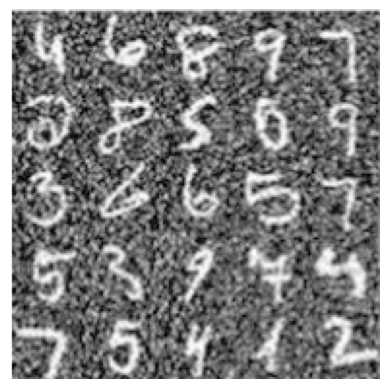

In [7]:
# * Load the image
img = cv2.imread("../noisy_img.png", cv2.IMREAD_GRAYSCALE)

# * Display the image
plt.imshow(img, cmap="gray")
plt.axis('off') 
plt.show()

In [8]:

# * Defining Constant Variables
IMG_SIZE = 191
FILTER_SIZE = 3


### Blurring Filters

Text(0.5, 1.0, 'Gaus + Med Filter ')

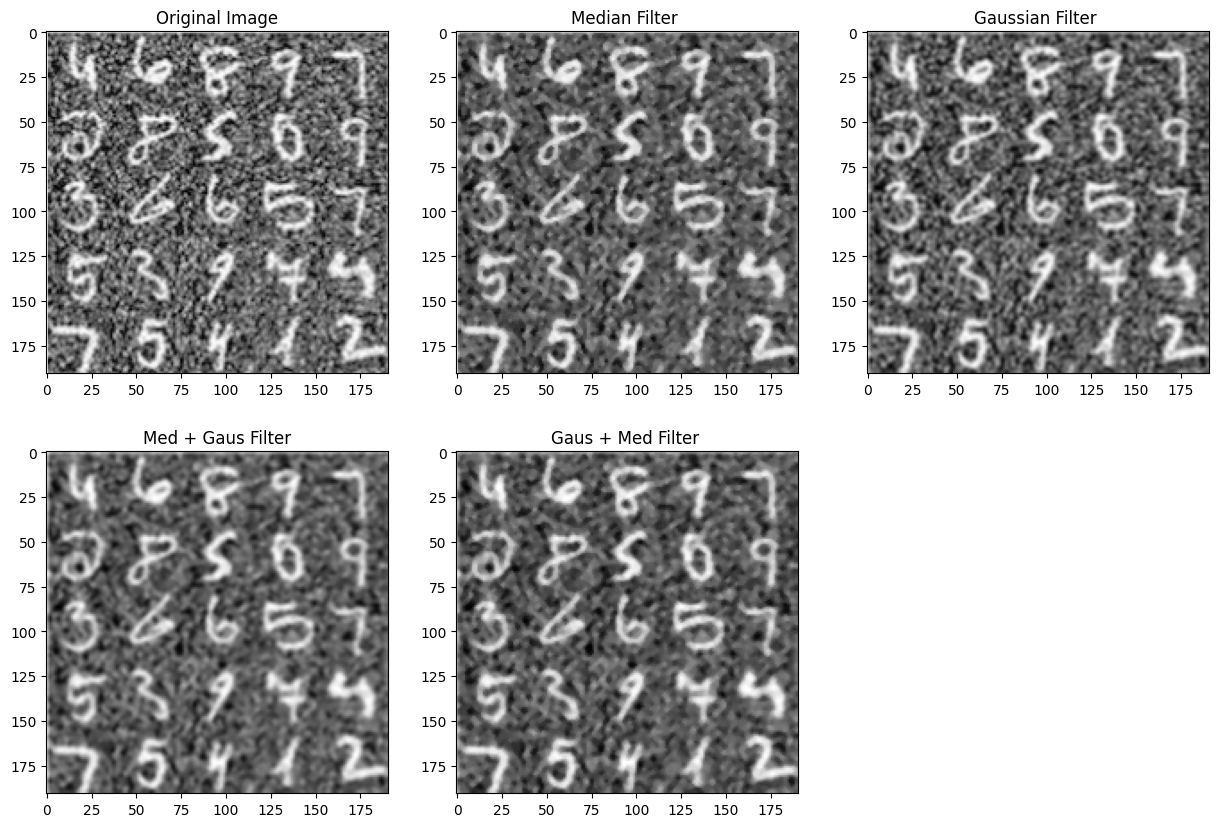

In [9]:

# * Applying multiple filters for testing

median_filtered = cv2.medianBlur(img, FILTER_SIZE)                                                  # * Median Filter
gaussian_filtered = cv2.GaussianBlur(img, (FILTER_SIZE, FILTER_SIZE), 0)                            # * Gaussian Filter
med_plus_gauss_filtered = cv2.GaussianBlur(median_filtered, (FILTER_SIZE, FILTER_SIZE), 0)          # * Median + Gaussian Filter
gasuu_plus_med_filtered = cv2.medianBlur(gaussian_filtered, FILTER_SIZE)                            # * Gaussian + Median Filter

# * Display Results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(median_filtered, cmap="gray")
plt.title("Median Filter ")

plt.subplot(2, 3, 3)
plt.imshow(gaussian_filtered, cmap="gray")
plt.title("Gaussian Filter ")

plt.subplot(2, 3, 4)
plt.imshow(med_plus_gauss_filtered, cmap="gray")
plt.title("Med + Gaus Filter")

plt.subplot(2, 3, 5)
plt.imshow(gasuu_plus_med_filtered, cmap="gray")
plt.title("Gaus + Med Filter ")



### Contrast Enhancement

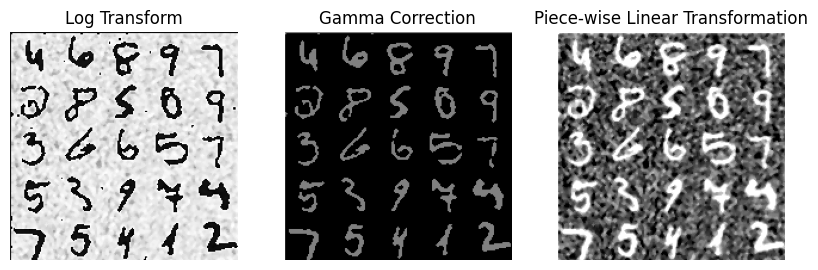

In [10]:
image = median_filtered

# * Log Transformation
# c = 255 / np.log(1 + np.max(image))  # Scaling factor
c = 50
log_image = c * np.log(1 + image.astype(np.float32))  # Applying log transform
log_image = np.uint8(log_image)  # Convert back to uint8


# * Power-Law (Gamma) Transformation
c = 0.008
# c = 1
gamma = 2  
gamma_corrected = np.array(c * 255 * (image / 255) ** gamma, dtype=np.uint8)

# * Piece-wise Linear Transformation, taken from Sir's code
r1, s1 = 50, 0   
r2, s2 = 200, 255  

def contrast_stretching(image, r1, s1, r2, s2):
    stretched = np.zeros_like(image, dtype=np.uint8)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r = image[i, j]
            if r < r1:
                stretched[i, j] = int((s1 / r1) * r)
            elif r1 <= r <= r2:
                stretched[i, j] = int(((s2 - s1) / (r2 - r1)) * (r - r1) + s1)
            else:
                stretched[i, j] = int(((255 - s2) / (255 - r2)) * (r - r2) + s2)

    return stretched

# * Apply the transformation
contrast_stretched = contrast_stretching(image, r1, s1, r2, s2)


# * Display the results
titles = ["Log Transform", "Gamma Correction", "Piece-wise Linear Transformation"]
images = [log_image, gamma_corrected, contrast_stretched]

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()

### Image Sharpening

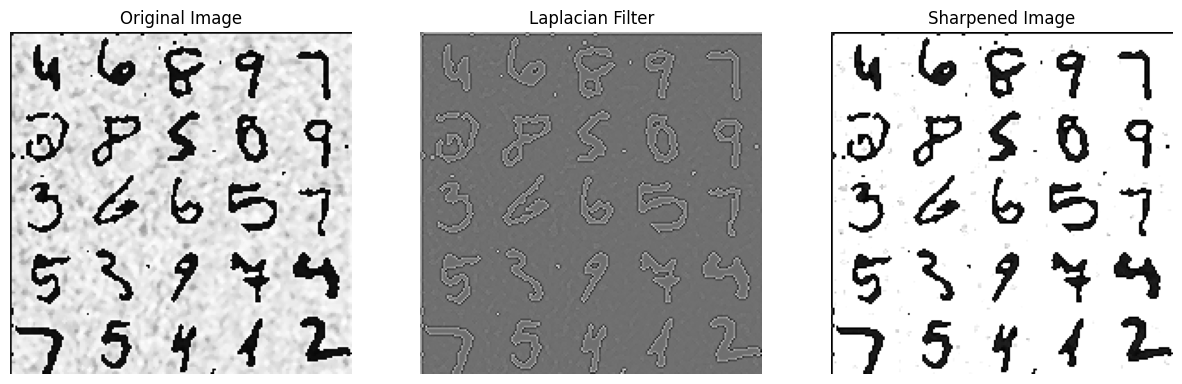

In [11]:
image = log_image

image = image.astype(np.float32)

# * Apply the Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_32F)

# * Combine the Laplacian result with the original image
sharpened_image = cv2.addWeighted(image, 1.5, laplacian, -0.5, 0)

# * Clip the values to the range [0, 255] and convert back to uint8
sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

# * Display the results
titles = ["Original Image", "Laplacian Filter", "Sharpened Image"]
images = [image, laplacian, sharpened_image]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()

### Thresholding

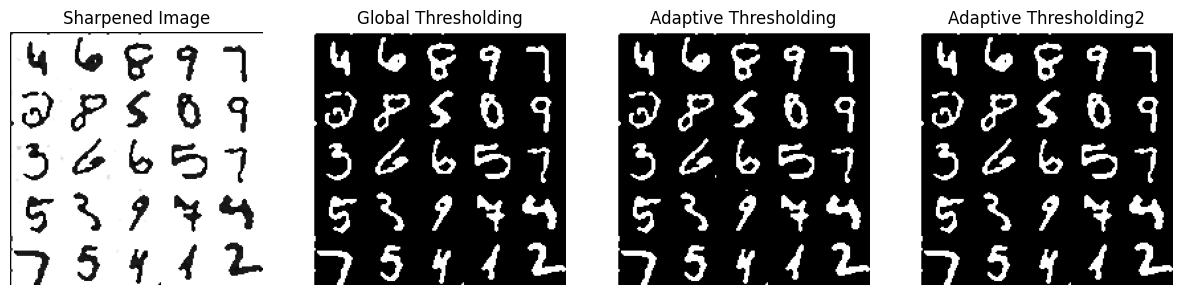

In [12]:
image = sharpened_image

# * Apply a median filter for noise removal and edge preservation
image = cv2.medianBlur(image, FILTER_SIZE)  

# * Global thresholding
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
global_thresh = cv2.bitwise_not(global_thresh)

# * Adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 101, 2)
adaptive_thresh = cv2.bitwise_not(adaptive_thresh)

# * Adaptive thresholding on the global thresholded image (for experimentation)
adaptive_thresh2 = cv2.adaptiveThreshold(global_thresh, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 101, 2)

# * Display the results
titles = ["Sharpened Image", "Global Thresholding", "Adaptive Thresholding", "Adaptive Thresholding2"]
images = [image, global_thresh, adaptive_thresh, adaptive_thresh2]

plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()

### Save Image

In [13]:

# * Save the binary image
cv2.imwrite("Preprocessed_Noisy_img.jpg", adaptive_thresh2)
print(f"Binary image saved at Preprocessed_Noisy_img.jpg")


Binary image saved at Preprocessed_Noisy_img.jpg


## Blurry Image 2

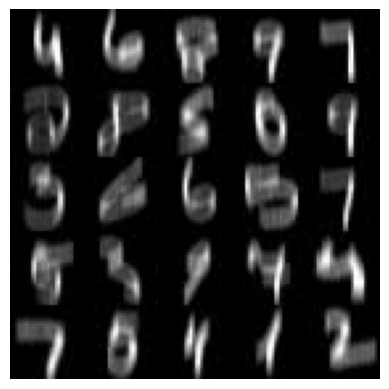

In [28]:

# * Load the image
img = cv2.imread("../blurry_img.jpg", cv2.IMREAD_GRAYSCALE)

# * Display the image
plt.imshow(img, cmap="gray")
plt.axis('off')  
plt.show()

### Contrast Stretching

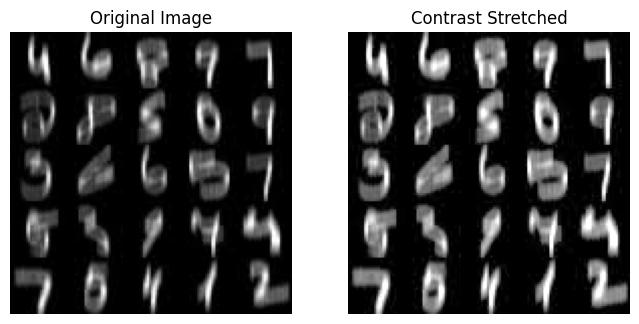

In [29]:
image = img

r1, s1 = 50, 100   
r2, s2 = 200, 255  

# * Apply contrast stretching
def contrast_stretching(image, r1, s1, r2, s2):
    stretched = np.zeros_like(image, dtype=np.uint8)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r = image[i, j]
            if r < r1:
                stretched[i, j] = int((s1 / r1) * r)
            elif r1 <= r <= r2:
                stretched[i, j] = int(((s2 - s1) / (r2 - r1)) * (r - r1) + s1)
            else:
                stretched[i, j] = int(((255 - s2) / (255 - r2)) * (r - r2) + s2)

    return stretched

# * Apply the transformation
contrast_stretched = contrast_stretching(image, r1, s1, r2, s2)

# * Display images
titles = ["Original Image", "Contrast Stretched"]
images = [image, contrast_stretched]

plt.figure(figsize=(8, 4))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()


# Blurring Filters

Text(0.5, 1.0, 'Gaus + Med Filter ')

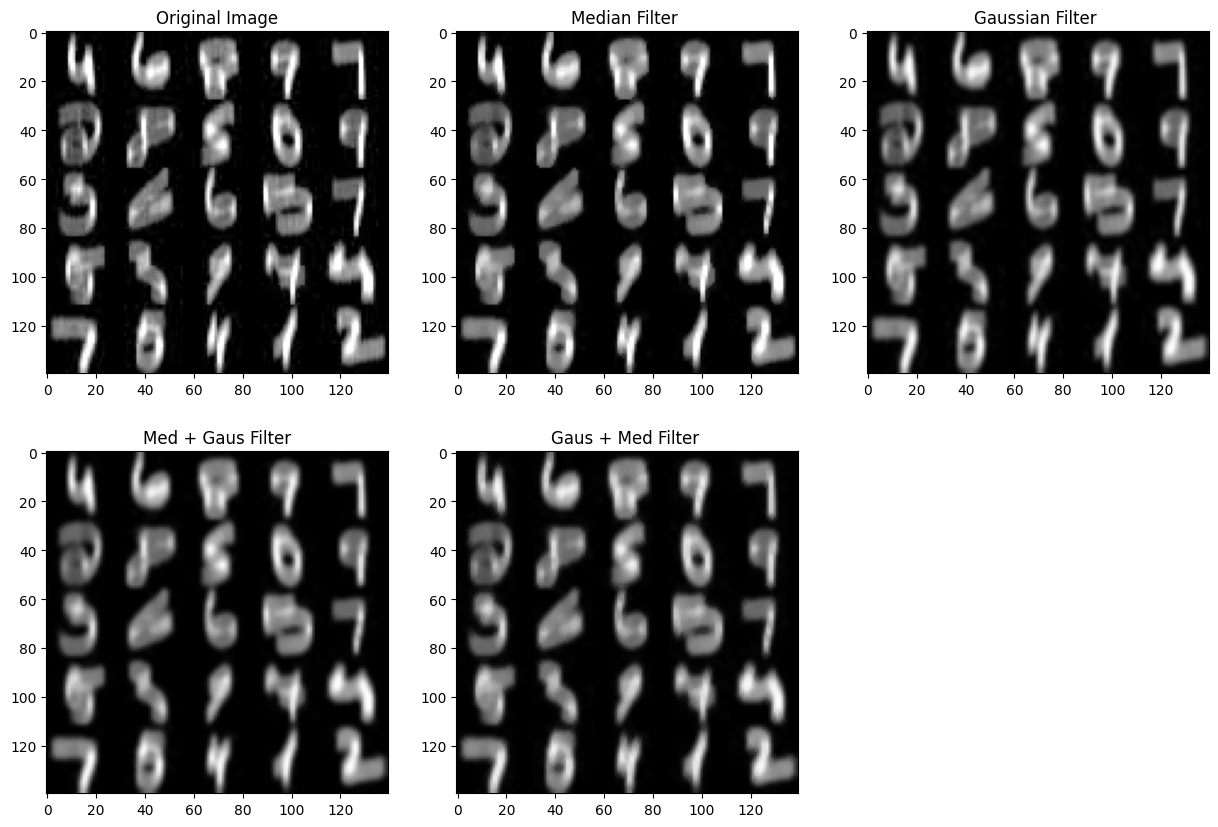

In [30]:
image = contrast_stretched

# * Applying multiple filters for testing

median_filtered = cv2.medianBlur(image, FILTER_SIZE)                                            # * Median Filter
gaussian_filtered = cv2.GaussianBlur(image, (FILTER_SIZE, FILTER_SIZE), 0)                      # * Gaussian Filter
med_plus_gauss_filtered = cv2.GaussianBlur(median_filtered, (FILTER_SIZE, FILTER_SIZE), 0)      # * Median + Gaussian Filter
gasuu_plus_med_filtered = cv2.medianBlur(gaussian_filtered, FILTER_SIZE)                        # * Gaussian + Median Filter


# * Display Results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(median_filtered, cmap="gray")
plt.title("Median Filter ")

plt.subplot(2, 3, 3)
plt.imshow(gaussian_filtered, cmap="gray")
plt.title("Gaussian Filter ")

plt.subplot(2, 3, 4)
plt.imshow(med_plus_gauss_filtered, cmap="gray")
plt.title("Med + Gaus Filter")

plt.subplot(2, 3, 5)
plt.imshow(gasuu_plus_med_filtered, cmap="gray")
plt.title("Gaus + Med Filter ")



### Contrast Stretching

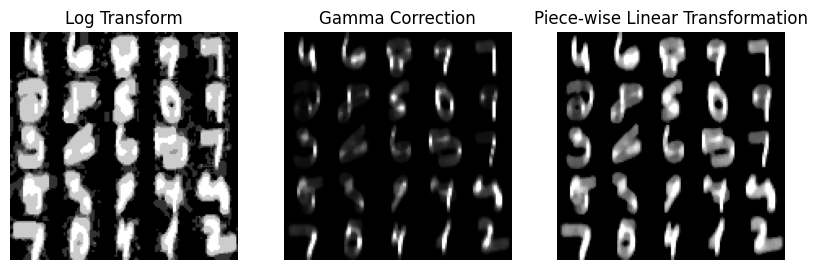

In [31]:
image = median_filtered

# * Log Transformation
c = 1
log_image = c * np.log(1 + image.astype(np.float32))  
log_image = np.uint8(log_image)  


# * Power-Law (Gamma) Transformation
c = 1
gamma = 3  
gamma_corrected = np.array(c * 255 * (image / 255) ** gamma, dtype=np.uint8)

# * Piece-wise Linear Transformation
r1, s1 = 50, 0   
r2, s2 = 200, 255  

def contrast_stretching(image, r1, s1, r2, s2):
    stretched = np.zeros_like(image, dtype=np.uint8)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r = image[i, j]
            if r < r1:
                stretched[i, j] = int((s1 / r1) * r)
            elif r1 <= r <= r2:
                stretched[i, j] = int(((s2 - s1) / (r2 - r1)) * (r - r1) + s1)
            else:
                stretched[i, j] = int(((255 - s2) / (255 - r2)) * (r - r2) + s2)

    return stretched

# * Apply the transformation
contrast_stretched = contrast_stretching(image, r1, s1, r2, s2)


# * Display the results
titles = ["Log Transform", "Gamma Correction", "Piece-wise Linear Transformation"]
images = [log_image, gamma_corrected, contrast_stretched]

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()

### Image Sharpening

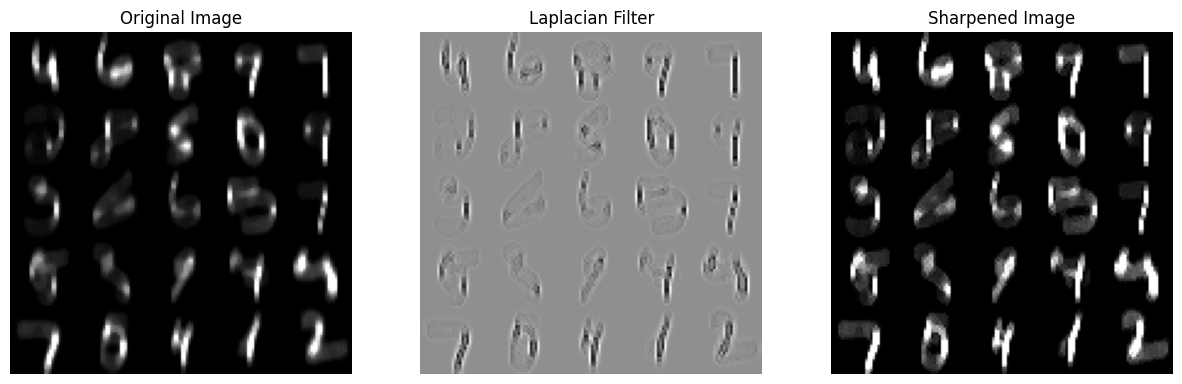

In [32]:
image = gamma_corrected

image = image.astype(np.float32)

# * Apply the Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_32F)

# * Combine the Laplacian result with the original image
sharpened_image = cv2.addWeighted(image, 1.5, laplacian, -0.5, 0)

# * Clip the values to the range [0, 255] and convert back to uint8
sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

# * Display the results
titles = ["Original Image", "Laplacian Filter", "Sharpened Image"]
images = [image, laplacian, sharpened_image]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()

### Thresholding

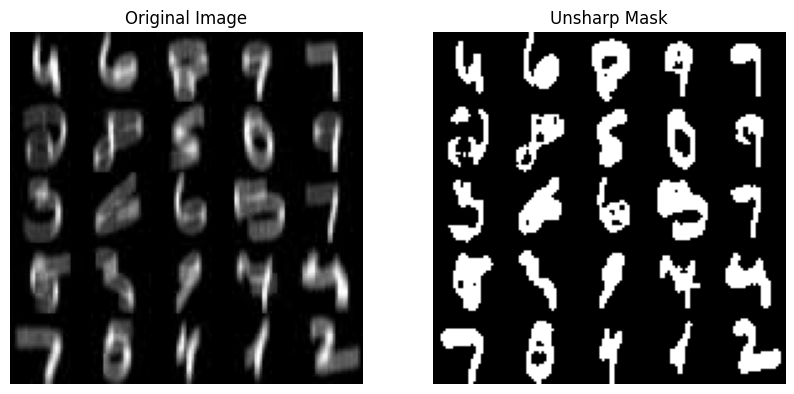

In [33]:

image = sharpened_image

# * Unsharp Masking
blur_img = cv2.GaussianBlur(image, (FILTER_SIZE, FILTER_SIZE), 0)  # * Apply a Gaussian filter for blurred image
unsharp_mask = cv2.addWeighted(image, 2, blur_img, -1, 0)  # * Apply the unsharp mask for image sharpening

# * Applying Laplacian filter
laplacian = cv2.Laplacian(unsharp_mask, cv2.CV_32F)
laplacian = np.uint8(np.absolute(laplacian))
sharpened_image = cv2.addWeighted(unsharp_mask, 1.5, laplacian, -0.5, 0)

# * Apply thresholding
# sharpened_image = cv2.threshold(sharpened_image, 20, 255, cv2.THRESH_BINARY)[1]  
sharpened_image = cv2.adaptiveThreshold(sharpened_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 2)

# * Apply a median filter for noise removal and edge preservation
sharpened_image = cv2.medianBlur(sharpened_image, FILTER_SIZE)  

# * Display the results
titles = ["Original Image", "Unsharp Mask"]
images = [img, sharpened_image]

plt.figure(figsize=(10, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
    


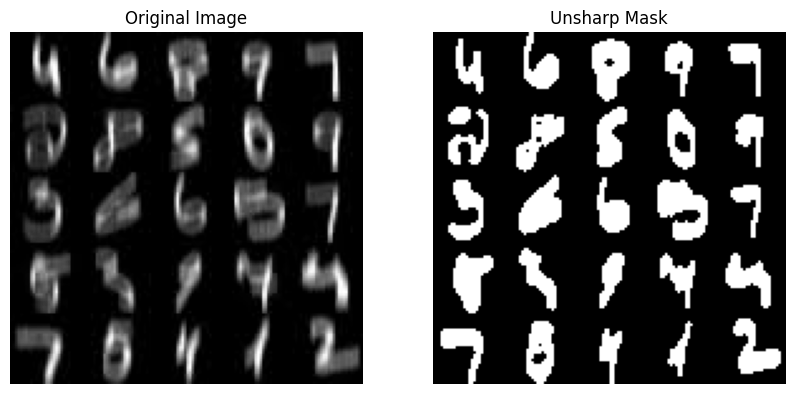

In [34]:

image = gamma_corrected

# * Unsharp Masking
blur_img = cv2.GaussianBlur(image, (FILTER_SIZE, FILTER_SIZE), 0)  # * Apply a Gaussian filter for blurred image
unsharp_mask = cv2.addWeighted(image, 2, blur_img, -1, 0)  # * Apply the unsharp mask for image sharpening

# * Applying Laplacian filter
laplacian = cv2.Laplacian(unsharp_mask, cv2.CV_32F)
laplacian = np.uint8(np.absolute(laplacian))
sharpened_image = cv2.addWeighted(unsharp_mask, 1.5, laplacian, -0.5, 0)

# * Apply thresholding
# sharpened_image = cv2.threshold(sharpened_image, 20, 255, cv2.THRESH_BINARY)[1]  
sharpened_image = cv2.adaptiveThreshold(sharpened_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 2)

# * Apply a median filter for noise removal and edge preservation
sharpened_image = cv2.medianBlur(sharpened_image, FILTER_SIZE)  

# * Display the results
titles = ["Original Image", "Unsharp Mask"]
images = [img, sharpened_image]

plt.figure(figsize=(10, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
    


### Save Image

In [19]:

# * Save the blurry image
cv2.imwrite("Preprocessed_Blurry_img.jpg", sharpened_image)
print(f"Binary image saved at Preprocessed_Blurry_img.jpg")


Binary image saved at Preprocessed_Blurry_img.jpg


# Q3

## Simple Watermark Image

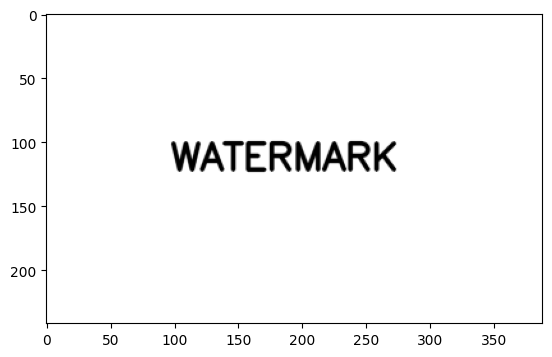

In [20]:
img = cv2.imread("../watermark_img1.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

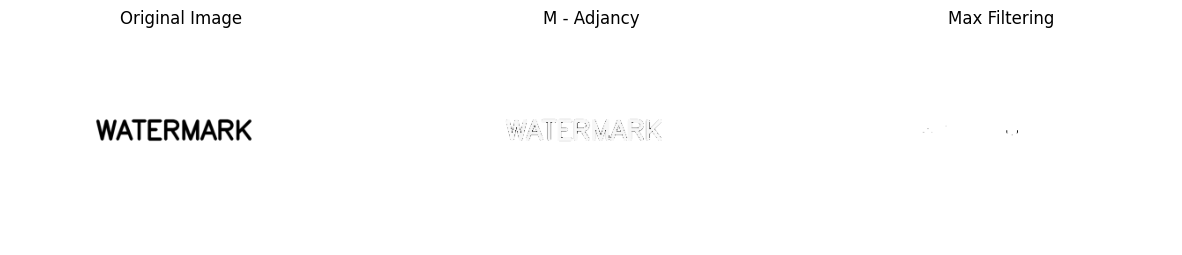

Image saved at Preprocessed_Simple_Watermark_img.jpg


In [22]:
img = cv2.imread("../watermark_img1.png", cv2.IMREAD_GRAYSCALE)
og = img.copy()

# * Adaptive thresholding to get the mask of the text
mask = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 5)
# _, mask = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)

# * Get indices for pixels of text
mask_indices = np.argwhere(mask == 255)

# * Use radius = 1 for 8 adjacent neighbors
radius = 21

# * Apply n adjancy filter to the image
for i, j in mask_indices:
    neighbors = []

    # * Get the n neighbors of the pixel from all sides
    for k in range(-radius, radius + 1):
        for l in range(-radius, radius + 1):
            try:
                if mask[i+k, j+l] == 0:
                    neighbors.append(img[i+k, j+l])
            except:
                pass
    if neighbors:
        img[i, j] = np.mean(neighbors)

# * Apply median filter to the image for edge preservation
img = cv2.medianBlur(img, 1)

# * Dialate the image to make the text less visible
dialated_img = cv2.dilate(img, np.ones( (8, 8), np.uint8) )

# * Display the results
titles = ["Original Image", "M - Adjancy", "Max Filtering"]
images = [og, img, dialated_img]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()


# * Save the blurry image
cv2.imwrite("Preprocessed_Simple_Watermark_img.jpg", dialated_img)
print(f"Image saved at Preprocessed_Simple_Watermark_img.jpg")


## Hard Watermark Image

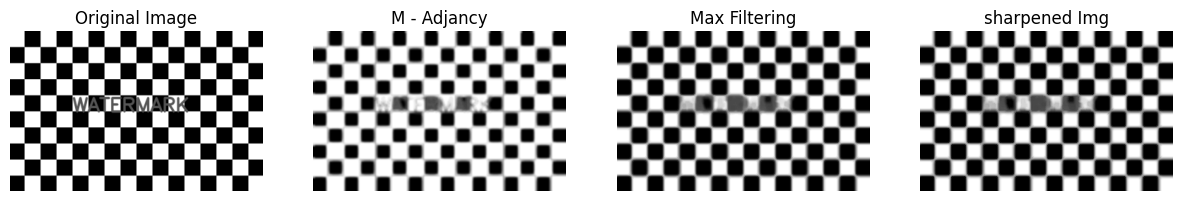

Image saved at Preprocessed_Hard_Watermark_img.jpg


In [23]:
img = cv2.imread("../watermark_img2.png", cv2.IMREAD_GRAYSCALE)
og = img.copy()

# * Adaptive thresholding to get the mask of the text
mask = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 5)

# * Get indices for pixels of text
mask_indices = np.argwhere(mask == 255)

# * Use radius = 1 for 8 adjacent neighbors
radius = 3

# * Apply n adjancy filter to the image
for i, j in mask_indices:
    neighbors = []

    # * Get the n neighbors of the pixel from all sides
    for k in range(-radius, radius + 1):
        for l in range(-radius, radius + 1):
            try:
                if mask[i+k, j+l] == 0:
                    neighbors.append(img[i+k, j+l])
            except:
                pass
    if neighbors:
        img[i, j] = np.mean(neighbors)

# * Apply max filter to the image for edge preservation
img = cv2.medianBlur(img, 1)

# * Apply Gasussian blur to the image for smoothing
img = cv2.GaussianBlur(img, (5, 5), 0)

# * erode the image to make the darker checks more visible
dialated_img = cv2.erode(img, np.ones( (5, 5), np.uint8) )

# * Apply median filter to the image for edge preservation of the darker checks
dialated_img = cv2.medianBlur(dialated_img, 3)

# * Sharpen the image to make the checks more visible and prominent
sharpened_img = cv2.Laplacian(dialated_img, cv2.CV_64F)
sharpened_img = np.uint8(np.abs(sharpened_img))

# * Add the sharpened image to the dialated image to make the checks more visible and text less visible
sharpened_img = cv2.addWeighted(dialated_img, 1.5, sharpened_img, -0.5, 0)


# * Display the results
titles = ["Original Image", "M - Adjancy", "Max Filtering", "sharpened Img"]
images = [og, img, dialated_img, sharpened_img]

plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()


# * Save the blurry image
cv2.imwrite("Preprocessed_Hard_Watermark_img.jpg", sharpened_img)
print(f"Image saved at Preprocessed_Hard_Watermark_img.jpg")


### Using cv2.inpainting for Reference

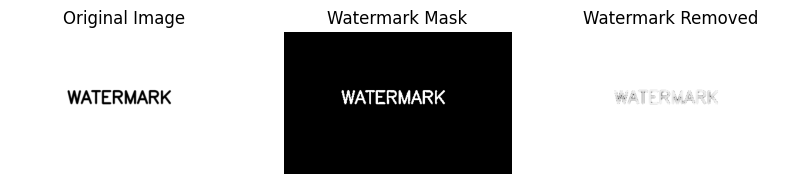

In [24]:

# * Load the grayscale image
image = cv2.imread("../watermark_img1.png", cv2.IMREAD_GRAYSCALE)

# * Adaptive thresholding to get the mask of the text
mask = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 5)

# * Apply inpainting to remove watermark by using nearby pixels to fill in the text
inpainted = cv2.inpaint(image, mask, inpaintRadius=21, flags=cv2.INPAINT_TELEA)

# * Apply median filter to the image for edge preservation
inpainted = cv2.medianBlur(inpainted, 1)

# * Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Watermark Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Watermark Removed")
plt.imshow(inpainted, cmap="gray")
plt.axis("off")

plt.show()
